In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Udemy/ML com Python/Datasets/recipeData.csv", encoding='latin1')

In [ ]:
# Olhar as primeiras linhas
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [ ]:
# Quantidade de linhas e colunas.
df.shape

(73861, 23)

In [ ]:
# Tipo de dado de cada variável.
df.dtypes

,0
BeerID,int64
Name,object
URL,object
Style,object
StyleID,int64
Size(L),float64
OG,float64
FG,float64
ABV,float64
IBU,float64


In [ ]:
# Quantidade de valores nulos
df.isnull().sum()

,0
BeerID,0
Name,2
URL,0
Style,596
StyleID,0
Size(L),0
OG,0
FG,0
ABV,0
IBU,0


In [ ]:
# Porcentagem da quantidade de nulos
nulos = (df.isnull().sum() / df.shape[0]) * 100
print(nulos)

BeerID            0.000000
Name              0.002708
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.847673
PrimingAmount    93.536508
UserId           68.358132
dtype: float64


In [ ]:
columns_drop = ['Style', 'PitchRate', 'PrimingMethod', 'PrimingAmount', 'UserId', 'BeerID',
                'Name', 'URL', 'Style']
df.drop(columns_drop, axis=1, inplace=True)

In [ ]:
df.shape

(73861, 15)

In [ ]:
df['SugarScale'].value_counts()

,count
SugarScale,
Specific Gravity,71959
Plato,1902


In [ ]:
df['BrewMethod'].value_counts()

,count
BrewMethod,
All Grain,49692
BIAB,12016
extract,8626
Partial Mash,3527


In [ ]:
df['SugarScale'].replace({'Specific Gravity': 1, 'Plato': 0}, inplace=True)

In [ ]:
df.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PrimaryTemp
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,1,All Grain,17.78
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,1,All Grain,NaN
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,1,extract,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,1,All Grain,NaN
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,1,All Grain,19.00


In [ ]:
# Aplicação de OHE para BrewMethod
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [ ]:
ohe_transform = ohe.fit_transform(df[['BrewMethod']])

In [ ]:
# Juntando as informações
df = pd.concat([df, ohe_transform], axis=1).drop(columns=['BrewMethod'])

In [ ]:
df.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PrimaryTemp,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,1,17.78,1.0,0.0,0.0,0.0
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,1,NaN,1.0,0.0,0.0,0.0
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,1,NaN,0.0,0.0,0.0,1.0
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,1,NaN,1.0,0.0,0.0,0.0
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,1,19.00,1.0,0.0,0.0,0.0


In [ ]:
# Verificar e remover estilos com menos de 1000 amostras.
contagem_estilo = df['StyleID'].value_counts()
estilos_remover = contagem_estilo[contagem_estilo < 1000].index
df = df[~df['StyleID'].isin(estilos_remover)]

In [ ]:
df.shape

(35424, 18)

In [ ]:
# Porcentagem da quantidade de nulos
nulos = (df.isnull().sum() / df.shape[0]) * 100
print(nulos)

StyleID                     0.000000
Size(L)                     0.000000
OG                          0.000000
FG                          0.000000
ABV                         0.000000
IBU                         0.000000
Color                       0.000000
BoilSize                    0.000000
BoilTime                    0.000000
BoilGravity                 3.669828
Efficiency                  0.000000
MashThickness              40.918586
SugarScale                  0.000000
PrimaryTemp                31.800474
BrewMethod_All Grain        0.000000
BrewMethod_BIAB             0.000000
BrewMethod_Partial Mash     0.000000
BrewMethod_extract          0.000000
dtype: float64


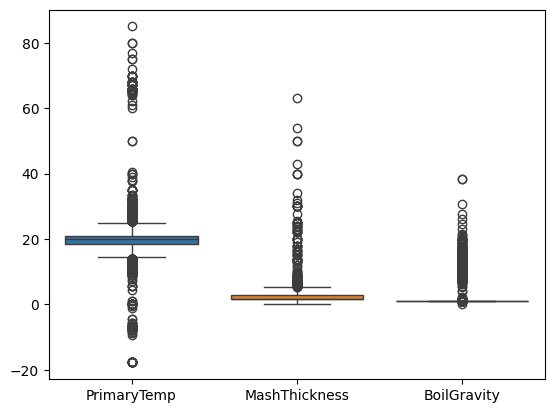

In [ ]:
# Avaliação das variáveis com valores ausentes
colunas = ['PrimaryTemp', 'MashThickness', 'BoilGravity']

sns.boxplot(data=df[colunas])
plt.show();

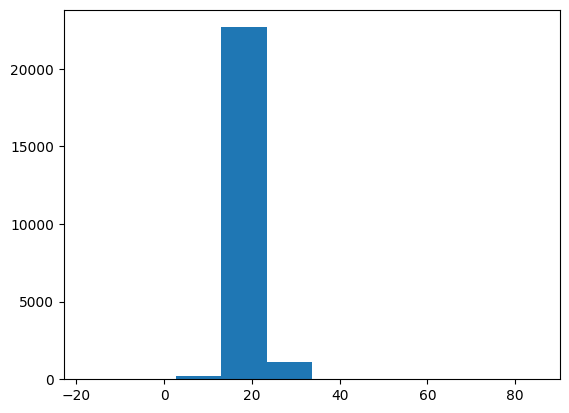

In [ ]:
plt.hist(df['PrimaryTemp'])
plt.show();

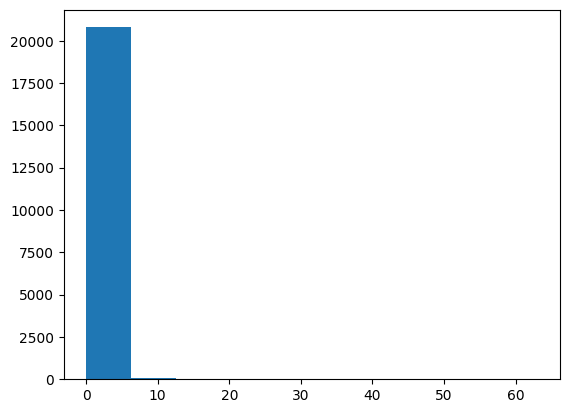

In [ ]:
plt.hist(df['MashThickness'])
plt.show();

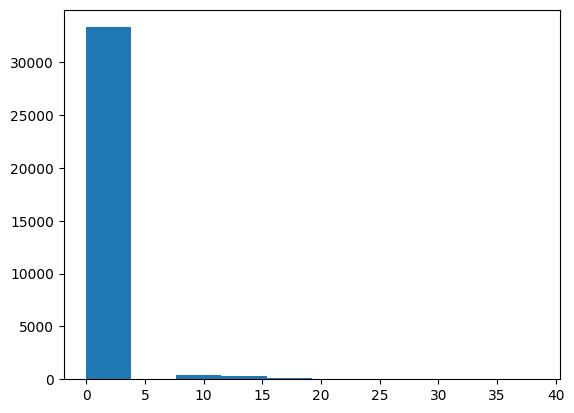

In [ ]:
plt.hist(df['BoilGravity'])
plt.show();

In [ ]:
df[colunas].describe()

,PrimaryTemp,MashThickness,BoilGravity
count,24159.000000,20929.000000,34124.000000
mean,19.750102,2.123185,1.317733
std,3.606455,1.676618,1.765424
min,-17.780000,0.000000,0.000000
25%,18.330000,1.500000,1.040000
50%,20.000000,1.500000,1.047000
75%,21.000000,3.000000,1.057000
max,85.000000,63.000000,38.400000


In [ ]:
# Preenchimento dos valores ausentes.
df['PrimaryTemp'].fillna(df['PrimaryTemp'].mean(), inplace=True)
df['MashThickness'].fillna(df['MashThickness'].median(), inplace=True)
df['BoilGravity'].fillna(df['BoilGravity'].median(), inplace=True)

In [ ]:
# Verificar os nulos mais uma vez.
nulos = (df.isnull().sum() / df.shape[0]) * 100
print(nulos)

StyleID                    0.0
Size(L)                    0.0
OG                         0.0
FG                         0.0
ABV                        0.0
IBU                        0.0
Color                      0.0
BoilSize                   0.0
BoilTime                   0.0
BoilGravity                0.0
Efficiency                 0.0
MashThickness              0.0
SugarScale                 0.0
PrimaryTemp                0.0
BrewMethod_All Grain       0.0
BrewMethod_BIAB            0.0
BrewMethod_Partial Mash    0.0
BrewMethod_extract         0.0
dtype: float64


In [ ]:
# Separação das variáveis
X = df.drop(columns=['StyleID'])
y = df['StyleID']

In [ ]:
# Correção dos rótulos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Validação Cruzada
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Parametros para testar nos modelos
param_grids = {
    "Logistic Regression": {
        "model__C": uniform(0.01, 10),  # Regularização
        "model__penalty": ["l2", "none"]
    },
    "Naive Bayes": {
    },
    "Decision Tree": {
        "model__max_depth": np.arange(1, 21, 1),
        "model__min_samples_split": np.arange(2, 11, 1)
    },
    "Random Forest": {
        "model__n_estimators": [50, 100, 150, 200],
        "model__max_depth": np.arange(1, 21, 1),
        "model__min_samples_split": np.arange(2, 11, 1)
    },
    "Bagging": {
        "model__n_estimators": [50, 100, 150, 200],
        "model__max_samples": np.arange(1, 21, 1)
    },
    "Extra Tree": {
        "model__max_depth": np.arange(1, 21, 1),
        "model__min_samples_split": np.arange(2, 11, 1),
        "model__criterion": ["gini", "entropy"]
    },
    "AdaBoost": {
        "model__n_estimators": [50, 100, 150, 200],
        "model__learning_rate": [0.2, 0.1, 0.01, 0.001]
    },
    "XGBoost": {
        "model__n_estimators": [50, 100, 150, 200],
        "model__learning_rate": [0.2, 0.1, 0.01, 0.001],
        "model__max_depth": np.arange(1, 14, 1)
    },
    "LightGBM": {
        "model__n_estimators": [50, 100, 150, 200],
        "model__learning_rate": [0.2, 0.1, 0.01, 0.001],
        "model__num_leaves": np.arange(2, 11, 1)
    },
    "CatBoost": {
        "model__iterations": [50, 100, 150],
        "model__learning_rate": [0.1, 0.01, 0.001],
        "model__depth": np.arange(1, 11, 1)
    }
}

In [ ]:
# Padronizacao
standard_scaler = StandardScaler()

# Nenhum preprocessamento
sem_preprocess = 'passthrough'

In [ ]:
# Criacao dos pipelines

pipes = {
    'Logistic Regression': Pipeline([
        ('scaler', standard_scaler),
        ('model', LogisticRegression())
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', standard_scaler),
        ('model', GaussianNB())
    ]),
    'Decision Tree': Pipeline([
        ('scaler', sem_preprocess),
        ('model', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('scaler', sem_preprocess),
        ('model', RandomForestClassifier())
    ]),
    'Bagging': Pipeline([
        ('scaler', sem_preprocess),
        ('model', BaggingClassifier())
    ]),
    'Extra Tree': Pipeline([
        ('scaler', sem_preprocess),
        ('model', ExtraTreesClassifier())
    ]),
    'AdaBoost': Pipeline([
        ('scaler', standard_scaler),
        ('model', AdaBoostClassifier())
    ]),
    'XGBoost': Pipeline([
        ('scaler', standard_scaler),
        ('model', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
    ]),
    'LightGBM': Pipeline([
        ('scaler', standard_scaler),
        ('model', LGBMClassifier())
    ]),
    'CatBoost': Pipeline([
        ('scaler', standard_scaler),
        ('model', CatBoostClassifier(verbose=0))
    ])
}

In [ ]:
best_models = {}

for model_name, pipe in pipes.items():
  print(f"Treinando {model_name}")
  param_grid = param_grids.get(model_name, {})
  search = RandomizedSearchCV(
      pipe,
      param_distributions=param_grid,
      n_iter=50,
      scoring='accuracy',
      cv=strat_kfold,
      random_state=42,
      n_jobs=-1
  )
  search.fit(X_train, y_train)
  best_models[model_name] = search
  print(f"Melhor acuracia: {search.best_score_}")
  print(f"Melhor hiperparametros: {search.best_params_}")

Treinando Logistic Regression
Melhor acuracia: 0.504217093875959
Melhor hiperparametros: {'model__C': 5.257746602583891, 'model__penalty': 'l2'}
Treinando Naive Bayes
Melhor acuracia: 0.4287381762632004
Melhor hiperparametros: {}
Treinando Decision Tree
Melhor acuracia: 0.588341254117768
Melhor hiperparametros: {'model__min_samples_split': 6, 'model__max_depth': 8}
Treinando Random Forest
Melhor acuracia: 0.6214403636101442
Melhor hiperparametros: {'model__n_estimators': 200, 'model__min_samples_split': 3, 'model__max_depth': 17}
Treinando Bagging
Melhor acuracia: 0.46338986784662134
Melhor hiperparametros: {'model__n_estimators': 50, 'model__max_samples': 20}
Treinando Extra Tree
Melhor acuracia: 0.5639578654865127
Melhor hiperparametros: {'model__min_samples_split': 2, 'model__max_depth': 20, 'model__criterion': 'entropy'}
Treinando AdaBoost
Melhor acuracia: 0.5713683972344689
Melhor hiperparametros: {'model__n_estimators': 200, 'model__learning_rate': 0.2}
Treinando XGBoost
Melhor a

In [ ]:
print("\nAvaliação no conjunto de teste:")
for model_name, search in best_models.items():
    print(f"\nModelo: {model_name}")
    print(f"Melhores hiperparâmetros: {search.best_params_}")
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia no conjunto de teste: {acc:.2f}")


Avaliação no conjunto de teste:

Modelo: Logistic Regression
Melhores hiperparâmetros: {'model__C': 5.257746602583891, 'model__penalty': 'l2'}
Acurácia no conjunto de teste: 0.50

Modelo: Naive Bayes
Melhores hiperparâmetros: {}
Acurácia no conjunto de teste: 0.43

Modelo: Decision Tree
Melhores hiperparâmetros: {'model__min_samples_split': 6, 'model__max_depth': 8}
Acurácia no conjunto de teste: 0.59

Modelo: Random Forest
Melhores hiperparâmetros: {'model__n_estimators': 200, 'model__min_samples_split': 3, 'model__max_depth': 17}
Acurácia no conjunto de teste: 0.62

Modelo: Bagging
Melhores hiperparâmetros: {'model__n_estimators': 50, 'model__max_samples': 20}
Acurácia no conjunto de teste: 0.47

Modelo: Extra Tree
Melhores hiperparâmetros: {'model__min_samples_split': 2, 'model__max_depth': 20, 'model__criterion': 'entropy'}
Acurácia no conjunto de teste: 0.56

Modelo: AdaBoost
Melhores hiperparâmetros: {'model__n_estimators': 200, 'model__learning_rate': 0.2}
Acurácia no conjunto 


Matriz de Confusão e Classification Report:

Modelo: Logistic Regression
Melhores hiperparâmetros: {'model__C': 5.257746602583891, 'model__penalty': 'l2'}
Acurácia nos dados de teste: 0.50

Classification Report:
              precision    recall  f1-score   support

           4       0.28      0.13      0.18       408
           6       0.50      0.27      0.35       230
           7       0.61      0.82      0.70      2388
           9       0.13      0.05      0.07       455
          10       0.44      0.63      0.51      1516
          12       0.67      0.87      0.75       254
          30       0.07      0.02      0.03       351
          39       0.00      0.00      0.00       209
          86       0.55      0.18      0.27       296
          92       0.29      0.15      0.19       241
         134       0.43      0.34      0.38       523
         175       0.27      0.21      0.24       214

    accuracy                           0.50      7085
   macro avg       0.35     

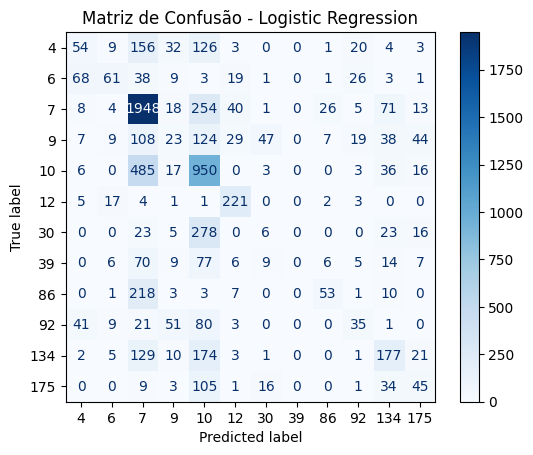


Modelo: Naive Bayes
Melhores hiperparâmetros: {}
Acurácia nos dados de teste: 0.43

Classification Report:
              precision    recall  f1-score   support

           4       0.31      0.13      0.18       408
           6       0.32      0.65      0.43       230
           7       0.70      0.47      0.56      2388
           9       0.26      0.09      0.14       455
          10       0.41      0.65      0.51      1516
          12       0.59      0.44      0.50       254
          30       0.29      0.39      0.33       351
          39       0.08      0.01      0.02       209
          86       0.33      0.31      0.32       296
          92       0.27      0.46      0.34       241
         134       0.31      0.53      0.39       523
         175       0.14      0.05      0.07       214

    accuracy                           0.43      7085
   macro avg       0.33      0.35      0.32      7085
weighted avg       0.46      0.43      0.42      7085


Matriz de Confusão:
[[  

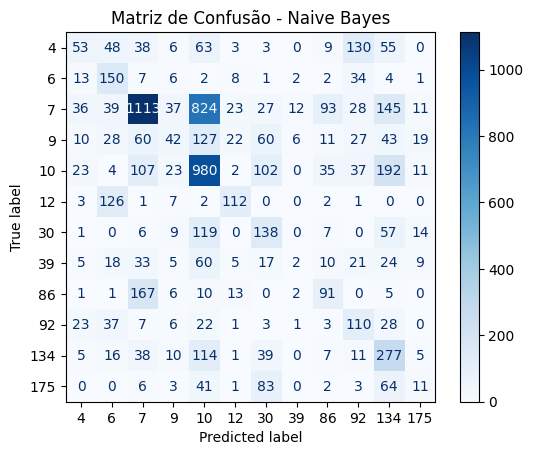


Modelo: Decision Tree
Melhores hiperparâmetros: {'model__min_samples_split': 6, 'model__max_depth': 8}
Acurácia nos dados de teste: 0.59

Classification Report:
              precision    recall  f1-score   support

           4       0.41      0.42      0.41       408
           6       0.50      0.62      0.55       230
           7       0.69      0.77      0.73      2388
           9       0.45      0.24      0.32       455
          10       0.59      0.61      0.60      1516
          12       0.71      0.82      0.76       254
          30       0.42      0.52      0.46       351
          39       0.11      0.00      0.01       209
          86       0.55      0.53      0.54       296
          92       0.49      0.51      0.50       241
         134       0.49      0.45      0.47       523
         175       0.59      0.35      0.44       214

    accuracy                           0.59      7085
   macro avg       0.50      0.49      0.48      7085
weighted avg       0.57   

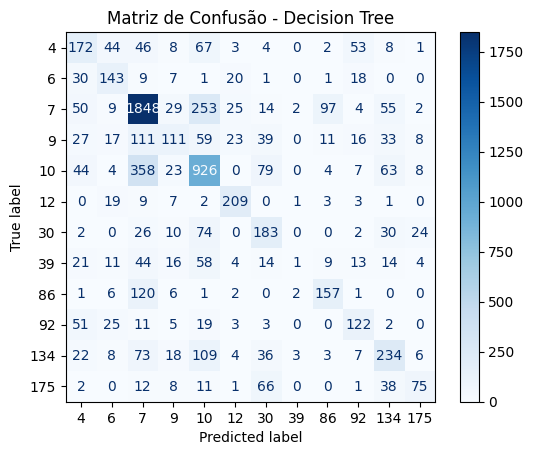


Modelo: Random Forest
Melhores hiperparâmetros: {'model__n_estimators': 200, 'model__min_samples_split': 3, 'model__max_depth': 17}
Acurácia nos dados de teste: 0.62

Classification Report:
              precision    recall  f1-score   support

           4       0.48      0.46      0.47       408
           6       0.56      0.61      0.58       230
           7       0.69      0.79      0.73      2388
           9       0.47      0.27      0.34       455
          10       0.59      0.64      0.61      1516
          12       0.70      0.86      0.77       254
          30       0.53      0.49      0.51       351
          39       0.50      0.01      0.02       209
          86       0.62      0.52      0.56       296
          92       0.55      0.56      0.55       241
         134       0.61      0.54      0.57       523
         175       0.64      0.51      0.57       214

    accuracy                           0.62      7085
   macro avg       0.58      0.52      0.52      70

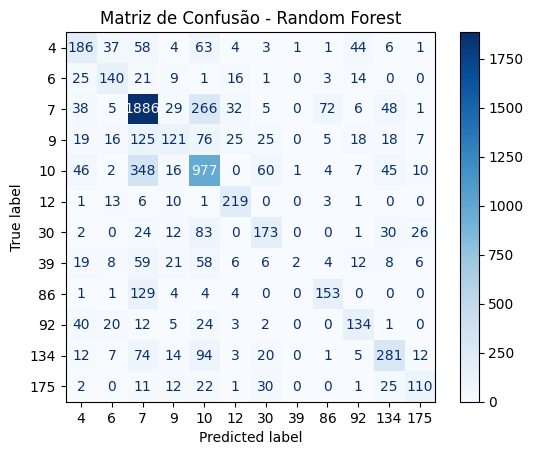


Modelo: Bagging
Melhores hiperparâmetros: {'model__n_estimators': 50, 'model__max_samples': 20}
Acurácia nos dados de teste: 0.47

Classification Report:
              precision    recall  f1-score   support

           4       0.19      0.26      0.22       408
           6       0.00      0.00      0.00       230
           7       0.55      0.89      0.68      2388
           9       0.67      0.00      0.01       455
          10       0.42      0.62      0.51      1516
          12       0.50      0.00      0.01       254
          30       0.26      0.21      0.23       351
          39       0.00      0.00      0.00       209
          86       0.30      0.01      0.02       296
          92       0.00      0.00      0.00       241
         134       0.32      0.09      0.14       523
         175       0.00      0.00      0.00       214

    accuracy                           0.47      7085
   macro avg       0.27      0.17      0.15      7085
weighted avg       0.40      0.47

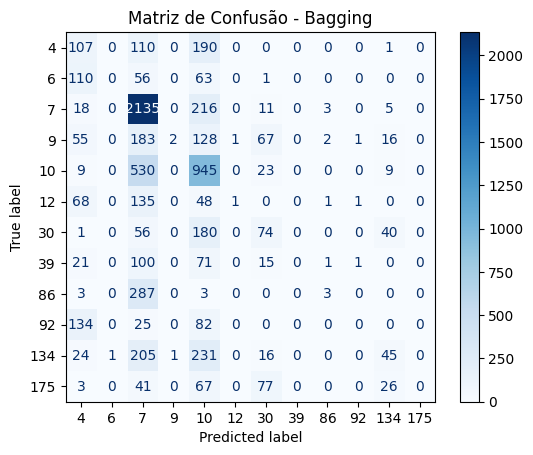


Modelo: Extra Tree
Melhores hiperparâmetros: {'model__min_samples_split': 2, 'model__max_depth': 20, 'model__criterion': 'entropy'}
Acurácia nos dados de teste: 0.56

Classification Report:
              precision    recall  f1-score   support

           4       0.45      0.29      0.35       408
           6       0.56      0.60      0.58       230
           7       0.59      0.87      0.70      2388
           9       0.61      0.22      0.33       455
          10       0.48      0.64      0.55      1516
          12       0.68      0.89      0.77       254
          30       0.60      0.09      0.16       351
          39       0.75      0.01      0.03       209
          86       0.63      0.24      0.35       296
          92       0.56      0.29      0.39       241
         134       0.78      0.23      0.36       523
         175       0.76      0.24      0.37       214

    accuracy                           0.56      7085
   macro avg       0.62      0.39      0.41      70

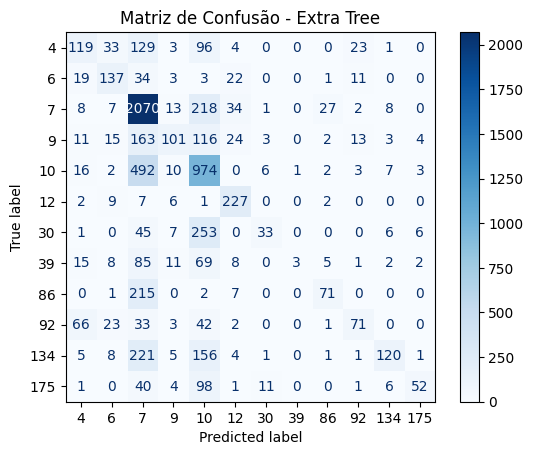


Modelo: AdaBoost
Melhores hiperparâmetros: {'model__n_estimators': 200, 'model__learning_rate': 0.2}
Acurácia nos dados de teste: 0.58

Classification Report:
              precision    recall  f1-score   support

           4       0.41      0.47      0.44       408
           6       0.41      0.40      0.41       230
           7       0.67      0.81      0.73      2388
           9       0.48      0.19      0.28       455
          10       0.56      0.66      0.60      1516
          12       0.69      0.68      0.69       254
          30       0.44      0.34      0.38       351
          39       0.00      0.00      0.00       209
          86       0.51      0.22      0.31       296
          92       0.36      0.49      0.41       241
         134       0.53      0.47      0.50       523
         175       0.52      0.25      0.34       214

    accuracy                           0.58      7085
   macro avg       0.47      0.41      0.42      7085
weighted avg       0.55     

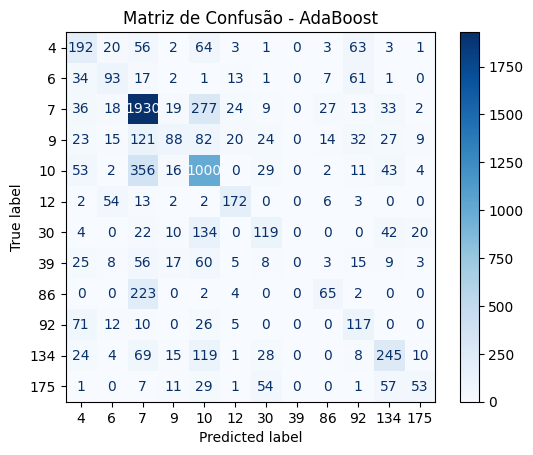


Modelo: XGBoost
Melhores hiperparâmetros: {'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.1}
Acurácia nos dados de teste: 0.62

Classification Report:
              precision    recall  f1-score   support

           4       0.45      0.46      0.45       408
           6       0.57      0.65      0.61       230
           7       0.70      0.78      0.74      2388
           9       0.51      0.32      0.39       455
          10       0.60      0.64      0.62      1516
          12       0.72      0.87      0.79       254
          30       0.55      0.48      0.51       351
          39       0.62      0.05      0.09       209
          86       0.59      0.53      0.56       296
          92       0.56      0.54      0.55       241
         134       0.59      0.55      0.57       523
         175       0.60      0.58      0.59       214

    accuracy                           0.62      7085
   macro avg       0.59      0.54      0.54      7085
weight

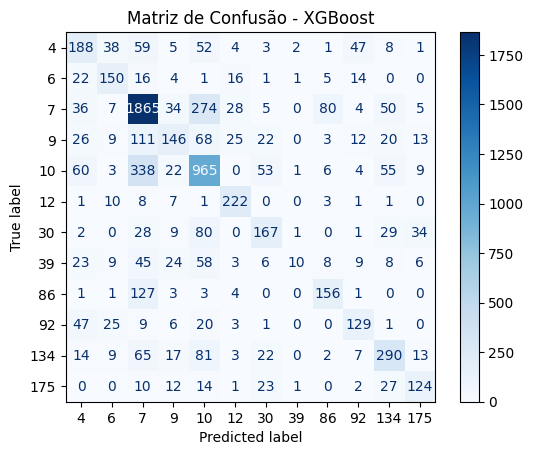


Modelo: LightGBM
Melhores hiperparâmetros: {'model__num_leaves': 4, 'model__n_estimators': 200, 'model__learning_rate': 0.1}
Acurácia nos dados de teste: 0.62

Classification Report:
              precision    recall  f1-score   support

           4       0.43      0.41      0.42       408
           6       0.55      0.60      0.57       230
           7       0.70      0.78      0.74      2388
           9       0.49      0.31      0.38       455
          10       0.60      0.64      0.62      1516
          12       0.68      0.86      0.76       254
          30       0.55      0.51      0.53       351
          39       1.00      0.03      0.06       209
          86       0.59      0.52      0.55       296
          92       0.49      0.54      0.51       241
         134       0.59      0.54      0.56       523
         175       0.62      0.57      0.60       214

    accuracy                           0.62      7085
   macro avg       0.61      0.53      0.52      7085
weig

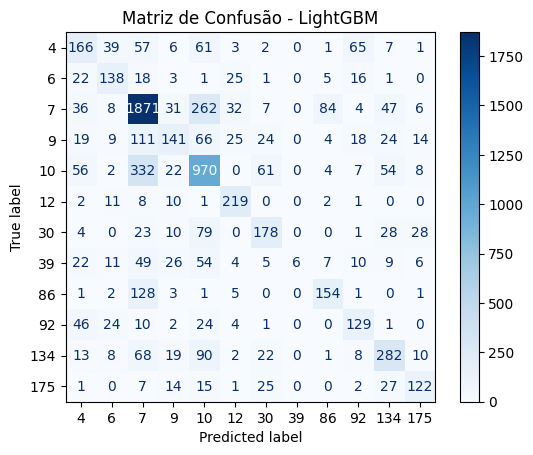


Modelo: CatBoost
Melhores hiperparâmetros: {'model__learning_rate': 0.1, 'model__iterations': 150, 'model__depth': 9}
Acurácia nos dados de teste: 0.62

Classification Report:
              precision    recall  f1-score   support

           4       0.44      0.46      0.45       408
           6       0.58      0.60      0.59       230
           7       0.69      0.78      0.73      2388
           9       0.49      0.32      0.39       455
          10       0.59      0.64      0.61      1516
          12       0.69      0.88      0.77       254
          30       0.57      0.51      0.54       351
          39       0.25      0.00      0.01       209
          86       0.59      0.53      0.56       296
          92       0.53      0.51      0.52       241
         134       0.58      0.55      0.57       523
         175       0.66      0.56      0.60       214

    accuracy                           0.62      7085
   macro avg       0.55      0.53      0.53      7085
weighted av

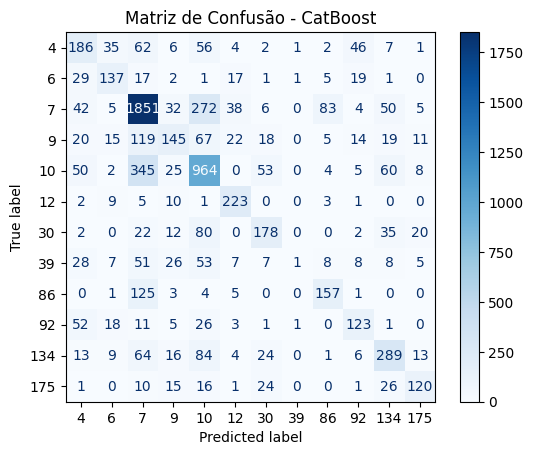

In [ ]:
# Classification report e Matriz de Confusão

target_names = [str(cls) for cls in label_encoder.classes_]

print("\nMatriz de Confusão e Classification Report:")
for model_name, search in best_models.items():
    print(f"\nModelo: {model_name}")
    print(f"Melhores hiperparâmetros: {search.best_params_}")

    # Buscar o melhor modelo
    best_model = search.best_estimator_

    # Previsão nos dados de teste
    y_pred = best_model.predict(X_test)

    # Verificação da acurácia
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia nos dados de teste: {acc:.2f}")

    # Report de Classificação
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nMatriz de Confusão:")
    print(conf_matrix)

    # Plot da matriz de confusão
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                     display_labels=target_names)
    cm_plot.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show();